In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

In [229]:
#inp1 = np.array([[1,2,3],[4,5,6],[7,8,9],[4,3,6],[7,8,9],[0,5,6]])
#q_point = np.array([[5,7,2],[10,20,30]])
#q_point

data = pd.read_csv('/home/ganesh/Downloads/Ganesh.csv')
print(len(data))
data1 = pd.read_csv('/home/ganesh/Downloads/danka naka.csv')
print(len(data1))

2923
2924


In [230]:
data

,Dams,Dates,Present Storage(TMC),Reservoir Level(TMC),Inflow,Outflow
0,Harangi,00/00/2011,0.00,0.00,0.0,0.0
1,Harangi,01/01/2011,3.74,2835.90,142.0,0.0
2,Harangi,02/01/2011,3.76,2836.09,239.0,0.0
3,Harangi,03/01/2011,3.77,2836.22,166.0,0.0
4,Harangi,04/01/2011,3.78,2836.31,118.0,0.0
...,...,...,...,...,...,...
2918,Harangi,27/12/2018,1.59,2806.15,103.0,15.0
2919,Harangi,28/12/2018,1.60,2806.33,98.0,15.0
2920,Harangi,29/12/2018,1.61,2806.54,102.0,15.0
2921,Harangi,30/12/2018,1.62,2806.72,99.0,15.0


In [231]:
data1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,MADIKERI,SOMWARPET,VIRAJPET
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Dams,Dates,Present Storage(TMC),Reservoir Level(TMC),Inflow,Outflow,NaN,MADIKERI,SOMWARPET,VIRAJPET
2,NaN,Harangi,01/01/2011,3.74,2835.9,142,0,NaN,Nan,Nan,Nan
3,NaN,Harangi,02/01/2011,3.76,2836.09,239,0,NaN,Nan,Nan,Nan
4,NaN,Harangi,03/01/2011,3.77,2836.22,166,0,NaN,Nan,Nan,Nan
...,...,...,...,...,...,...,...,...,...,...,...
2919,NaN,Harangi,27/12/2018,1.59,2806.15,103,15,NaN,Nan,Nan,Nan
2920,NaN,Harangi,28/12/2018,1.6,2806.33,98,15,NaN,Nan,Nan,Nan
2921,NaN,Harangi,29/12/2018,1.61,2806.54,102,15,NaN,Nan,Nan,Nan
2922,NaN,Harangi,30/12/2018,1.62,2806.72,99,15,NaN,Nan,Nan,Nan


In [232]:
data1 = data1.iloc[2:,8:]
data1.replace('Nan',0,inplace = True)

In [233]:
offset = 3
data.interpolate(method='linear', inplace=True)
#data = data.iloc[:1000,:]
#data.tail()
data
offset_length = len(data) - offset
#print(offset_length)
print(len(data1))
data1

2922


,MADIKERI,SOMWARPET,VIRAJPET
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
...,...,...,...
2919,0,0,0
2920,0,0,0
2921,0,0,0
2922,0,0,0


In [234]:
Dam_data = data.iloc[offset:,:]
print(len(Dam_data))
Dam_data

2920


,Dams,Dates,Present Storage(TMC),Reservoir Level(TMC),Inflow,Outflow
3,Harangi,03/01/2011,3.77,2836.220,166.0,0.0
4,Harangi,04/01/2011,3.78,2836.310,118.0,0.0
5,Harangi,05/01/2011,3.79,2836.410,130.0,0.0
6,Harangi,06/01/2011,3.81,2836.540,167.0,0.0
7,Harangi,07/01/2011,3.82,2836.635,149.0,0.0
...,...,...,...,...,...,...
2918,Harangi,27/12/2018,1.59,2806.150,103.0,15.0
2919,Harangi,28/12/2018,1.60,2806.330,98.0,15.0
2920,Harangi,29/12/2018,1.61,2806.540,102.0,15.0
2921,Harangi,30/12/2018,1.62,2806.720,99.0,15.0


In [287]:
#Dam_data = data.iloc[:,:offset_length]
Rain_data = data1
Rain_data = Rain_data.iloc[:offset_length,:]#Dam_data = data.iloc[1:offset_length,:]
print(len(Rain_data))
Rain_data
#test_data = Rain_data.iloc[:2074,:]
#train_data = Rain_data.iloc[:2920-2074,:]

2920


,MADIKERI,SOMWARPET,VIRAJPET
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
...,...,...,...
2917,0,0,0
2918,0,0,0
2919,0,0,0
2920,0,0,0


In [282]:
colA = np.array(Rain_data.loc[:,['MADIKERI','SOMWARPET','VIRAJPET']],dtype = float)
colB = np.array(Dam_data['Inflow'])

In [283]:
l,b = np.shape(colA)
l,b
print(l,b)
print(np.shape(colA))
print(np.shape(colB))
colA
colB = colB.T
t_vals = []
for i in range(l):
    a = colA[i]
    b = colB[i]
    t_vals.append((a,b))
#t_vals = np.array(t_vals)
print(t_vals)
np.shape(t_vals)

2920 3
(2920, 3)
(2920,)
[(array([0., 0., 0.]), 166.0), (array([0., 0., 0.]), 118.0), (array([0., 0., 0.]), 130.0), (array([0., 0., 0.]), 167.0), (array([0., 0., 0.]), 149.0), (array([0., 0., 0.]), 131.0), (array([0., 0., 0.]), 112.0), (array([0., 0., 0.]), 160.0), (array([0., 0., 0.]), 172.0), (array([0., 0., 0.]), 100.0), (array([0., 0., 0.]), 100.0), (array([0., 0., 0.]), 100.0), (array([0., 0., 0.]), 100.0), (array([0., 0., 0.]), 112.0), (array([0., 0., 0.]), 100.0), (array([0., 0., 0.]), 124.0), (array([0., 0., 0.]), 100.0), (array([0., 0., 0.]), 112.0), (array([0., 0., 0.]), 88.0), (array([0., 0., 0.]), 64.0), (array([0., 0., 0.]), 100.0), (array([0., 0., 0.]), 100.0), (array([0., 0., 0.]), 76.0), (array([0., 0., 0.]), 74.0), (array([0., 0., 0.]), 74.0), (array([0., 0., 0.]), 87.0), (array([0., 0., 0.]), 100.0), (array([0., 0., 0.]), 76.0), (array([0., 0., 0.]), 64.0), (array([0., 0., 0.]), 64.0), (array([0., 0., 0.]), 64.0), (array([0., 0., 0.]), 64.0), (array([0., 0., 0.]), 64.

(2920, 2)

In [240]:
# colA = np.array(data.loc[:,['MADIKERI','SOMWARPET','VIRAJPET']])
# colB = np.array(data['Inflow'])

# l,b = np.shape(colA)
# l,b
# print(np.shape(colA))
# print(np.shape(colB))
# colA
# colB = colB.T
# t_vals = []
# for i in range(l):
#     a = colA[i]
#     b = colB[i]
#     t_vals.append((a,b))
# #t_vals = np.array(t_vals)
# print(t_vals)
# np.shape(t_vals)


In [302]:
def create_qry_point(start,end):
    query_data = np.array(Rain_data.iloc[start:end,:],dtype = float)
    return query_data
        
q_point = create_qry_point(1000,2000)
#q_point = np.array([2.3,2.4,0.5],[])
print(q_point)
print(len(q_point))

[[2.12500000e-01 1.16666667e-02 2.35000000e-01]
 [0.00000000e+00 0.00000000e+00 4.16666667e-02]
 [1.15000000e+00 3.56666667e-01 2.65000000e-01]
 ...
 [1.31500000e+01 2.09000000e+00 2.96833333e+00]
 [1.18175000e+01 4.08333333e+00 6.00666667e+00]
 [1.25550000e+01 6.05666667e+00 3.54500000e+00]]
1000


In [303]:
inp1 = colA

In [304]:
def cal_eucledian_distance(q_point,inp1):
    #print(q_point,inp1)
    return float(np.linalg.norm(q_point - inp1))

In [305]:
def knn(inp1,k,q_point):
    tup_val = []
    distance_list = [cal_eucledian_distance(q_point,inp1[i]) for i in range(len(inp1))]
    #print(distance_list)
    for i in range(len(inp1)):
        tup_val.append((distance_list[i],inp1[i]))
    #print("---------------------------")
    #print(tup_val)
    index=0
    sorted_values = sort(tup_val)
    neighbours = sorted_values[:k]
    return neighbours

In [306]:
def last(n):
    m =0
    return n[m]

In [307]:
def sort(tuples):
    return sorted(tuples,key=last)

In [308]:
vals = knn(inp1,5,q_point)
print(vals)
len(vals)

[(663.522229243301, array([6.14      , 2.80166667, 2.78      ])), (663.6007124267819, array([6.785     , 2.78      , 4.06333333])), (663.7404906788996, array([5.725     , 2.41666667, 4.        ])), (663.900119056574, array([7.175     , 3.925     , 3.37666667])), (664.0178084919438, array([7.        , 2.86666667, 2.83333333]))]


5

In [309]:
print(vals[0])

(663.522229243301, array([6.14      , 2.80166667, 2.78      ]))


In [310]:
near_vals = []
for i in range(len(vals)):
    near_vals.append(vals[i][1])

In [311]:
near_vals = np.array(near_vals)
near_vals

array([[6.14      , 2.80166667, 2.78      ],
       [6.785     , 2.78      , 4.06333333],
       [5.725     , 2.41666667, 4.        ],
       [7.175     , 3.925     , 3.37666667],
       [7.        , 2.86666667, 2.83333333]])

In [312]:
np.shape(near_vals)

(5, 3)

In [313]:
len(near_vals) 

5

In [314]:
def normalize(mcolB, max_val, min_val):
    #print(mcolB)
    n_val = []
    for i in range(len(mcolB)):
        n_val.append(float(((mcolB[i] - min_val) / (max_val - min_val))))
    return n_val
    #return ( (point - m) / () )

In [315]:
reg_val = []
mcolB = []
mcolA = []
for i in range(len(t_vals)):
    if t_vals[i][0] in near_vals:
        reg_val.append((t_vals[i][0],t_vals[i][1]))
        mcolA.append(t_vals[i][0])
        mcolB.append(t_vals[i][1])
        #print("True")
#print(q_point)
#print(reg_val)
size_b = len(mcolB)
mcolB = np.array(mcolB)
mcolA = np.array(mcolA)
mcolB = mcolB.reshape((size_b,1))
max_val = np.max(mcolB)
min_val = np.min(mcolB)
print(np.shape(mcolB))
print(np.shape(mcolA))
#print(mcolA1[0])
print(mcolB)

(9, 1)
(9, 3)
[[2636. ]
 [1784. ]
 [1214. ]
 [ 101. ]
 [ 538. ]
 [3563. ]
 [ 111. ]
 [ 628. ]
 [ 472.5]]


In [316]:
normalized_tar_val = normalize(mcolB,max_val,min_val)
print(normalized_tar_val)
print(np.max(normalized_tar_val))
normalized_tar_val = np.array(normalized_tar_val)
normalized_tar_val = normalized_tar_val.reshape(size_b,1)
print(np.shape(normalized_tar_val))

[0.7322357019064125, 0.4861351819757366, 0.3214904679376083, 0.0, 0.12622761409589833, 1.0, 0.0028885037550548816, 0.15222414789139227, 0.10730791450028886]
1.0
(9, 1)


In [317]:
inp_matrix = mcolA

In [318]:
import numpy as np

In [319]:
def lwr(inp, out, k):
    m,n = np.shape(inp)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = inp[i] * beta(inp[i], inp, out, k)
    #print("The final prediction is :",ypred)
    return ypred
    

In [320]:
def beta(point, inp, out, k):
    wt = kernal(point, inp, k)
    #print("The weight of betas is",wt)
    beta_val = (inp.T * (wt*inp)).I * (inp.T * wt * out)
    #print("The weight is beta value is",beta_val)
    
    return beta_val

In [321]:
def kernal(point, inp, k):
    l,b = np.shape(inp)
    weights = np.mat(np.eye((l)))
    #print(weights)
    
    for i in range(l):
        diff = point - inp[i]
        #diff = np.array(diff)
        #print(len(diff))
        diff = diff.reshape(len(diff),1)
        #print(np.shape(diff))
        #diff1 = diff.T
        #print(np.shape(diff.T))
        a = np.dot(diff.T,diff)
        
        #print(a)
        #print(np.shape(a))
        weights[i,i] = np.exp(np.dot(diff.T,diff) / (-2.0 * (k**2)))
        #print(weights[i,i])
    #print("The weights of",i,'is',weights[i,i])
    
    return weights

[[2636. ]
 [1784. ]
 [1214. ]
 [ 101. ]
 [ 538. ]
 [3563. ]
 [ 111. ]
 [ 628. ]
 [ 472.5]]
[2604.79097614 1784.06236521 1210.29189933  -48.          538.94565182
 3571.2         144.20662889  627.91260681  498.86133725]
(9, 1)
(9, 3)


ValueError: x and y must be the same size

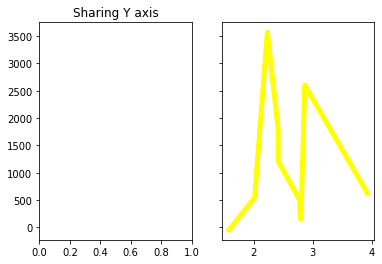

In [336]:
#mcolB = normalized_tar_val
ypred = lwr(inp_matrix, mcolB, 0.4)
print(mcolB)
#print(normalized_tar_val)
print(ypred)
print(np.shape(mcolB))

xsort = inp_matrix.copy()
xsort.sort(axis = 0)
print(np.shape(mcolA))

f, (ax1, ax2) = pt.subplots(1, 2, sharey=True)
pt.plot(xsort[:,1],ypred[mcolA[:,1].argsort(0)],color = 'yellow',linewidth = 5)#ypred[X[:, 1].argsort(0)]
ax1.set_title('Sharing Y axis')
ax2.scatter(mcolA, mcolB)

pt.scatter(mcolA,mcolB,color = 'blue')
pt.plot(xsort[:,1],ypred[mcolA[:,1].argsort(0)],color = 'yellow',linewidth = 5)#ypred[X[:, 1].argsort(0)]
#pt.plot(xsort[:, 1], ypred[X[:, 1].argsort(0)], color='yellow', linewidth=5)
pt.xlabel('MADIKERI')
pt.ylabel('Inflow')

In [323]:
from sklearn import metrics

In [324]:
metrics.accuracy_score(mcolB, ypred)

ValueError: continuous is not supported

In [337]:
import math
math.sqrt(metrics.mean_squared_error(mcolB,ypred))

52.7620436691333